##### Custom Function definitions

In [1]:
# For drawing a line of type '=' (i.e. =============) between observations when required
def lineDistributer(ch = '=', num = 127):
    print("\n" + ch * num + "\n")

In [2]:
# To remove columns from Data
def removeCols(data, list):
    for i in list:
        data.pop(i)
    return data

In [3]:
# For Making copy and creating a dataframe
def copyDF(val, val2, str = 'Data Accuracy'):
    result = val.copy()
    result.update(val2)
    return pd.DataFrame(list(result.items()), columns = ['Model', str])

##### Custom Varibales to store data

In [4]:
# Dictionary to store classifier percentages
train_percent = dict()
test_percent = dict()
train_percent2 = dict()
test_percent2 = dict()
baseModels = dict()
boostModels = dict()
k_fold_percent = dict()

# List to store classifier Type
ModelType = list()

##### Libraries

In [5]:
# Libraries

import warnings as w
# No warnings will be shown in Out[#]:
w.simplefilter("ignore")

# Data Pre-Processing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Visualization Plots
import seaborn as sns
import matplotlib.pyplot as plt

# For balancing data
from sklearn.utils import resample

# Getting data ready for models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification
from sklearn.datasets import make_classification

# Models
# 1. Naive Bayes------------------------------------
from sklearn.naive_bayes import GaussianNB
# 2. Logistic Regression----------------------------
from sklearn.linear_model import LogisticRegression
# 3. Decision Tree ---------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# 4. Support Vector Machines(SVM)-------------------
from sklearn.svm import SVC

# Enhancement
# 1. Random Forest----------------------------------
from sklearn.ensemble import RandomForestClassifier
# 2. XG Boost
#!pip install xgboost
from xgboost import XGBClassifier
# 3. Gradient Boosting------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# 4. ADA Boost
from sklearn.ensemble import AdaBoostClassifier
# 5. Bagging Classifier-----------------------------
from sklearn.ensemble import BaggingClassifier

# To prevent over fitting
from sklearn.model_selection import cross_val_score

# For checking best parameter we will use grid search cross validation
from sklearn.model_selection import GridSearchCV

# Checking Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
def modelValues(classifier = DecisionTreeClassifier(), model_name = 'model', X = [1], y = [1], model_type = 'base'):
    classifier.fit(X_train, y_train)
    baseModels[model_name] = classifier
    
    # Predicting one record to check the model
    print('Predicting one record to check the', model_name, 'model') 
    print('Desired Prediction = 0, Actual Prediction =', 
          classifier.predict(mms.transform([[1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.00527704, 1., 0.1, 0., 0., 0., 0., 0.]], )))

    if model_type.lower() == "base":
        # Checking Accuracy of train data----------------------------------------------
        train_pred = classifier.predict(X_train)
        train_percent[model_name] = round(accuracy_score(y_train, train_pred) * 100, 3)
        print("Train -> {:.3f}%".format(train_percent[model_name]))
        # Checking Accuracy on test data----------------------------------------------
        test_pred = classifier.predict(X_test)
        test_percent[model_name] = round(accuracy_score(y_test, test_pred) * 100, 3)
        print("Test -> {:.3f}%".format(test_percent[model_name]))

    elif model_type.lower() == "boost":
        # Checking Accuracy of train data----------------------------------------------
        train_pred = classifier.predict(X_train)
        train_percent2[model_name] = round(accuracy_score(y_train, train_pred) * 100, 3)
        print("Train -> {:.3f}%".format(train_percent2[model_name]))
        # Checking Accuracy on test data------------------------------------------------
        test_pred = classifier.predict(X_test)
        test_percent2[model_name] = round(accuracy_score(y_test, test_pred) * 100, 3)
        print("Test -> {:.3f}%".format(test_percent2[model_name]))
    
    # Checking Accuracy after K-Cross Validation to deal with Overfitting
    val = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    k_fold_percent[model_name] = round((val.mean()) * 100, 3)
    print("K-Fold Cross Validation -> {:.3f}%".format(k_fold_percent[model_name]))
    lineDistributer('*', 30)
    
    # Confusion Matrix
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

---

# 1. Identify a dataset from online resources available.

In [7]:
# Import Data
Data = pd.read_csv("../Dataset/Autism-Child-Data.csv")

In [8]:
Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,Age Grp,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,Others,no,no,Jordan,no,5,'4-11 years',1,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',1,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,?,no,no,Jordan,yes,5,'4-11 years',1,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,?,yes,no,Jordan,no,4,'4-11 years',1,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,Others,yes,no,'United States',no,10,'4-11 years',1,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,1,0,1,1,0,1,1,1,1,...,White-European,no,no,Russia,no,7,'18 and more',3,Self,YES
1096,1,0,0,0,0,0,0,1,0,1,...,Hispanic,no,no,Mexico,no,3,'18 and more',3,Parent,NO
1097,1,0,1,1,1,0,1,1,0,1,...,?,no,no,Russia,no,7,'18 and more',3,?,YES
1098,1,0,0,1,1,0,1,0,1,1,...,'South Asian',no,no,Pakistan,no,6,'18 and more',3,Self,NO


### Data Details
Features - 22\
Target feature - 1 named Class/ASD

---

# 2. Analysis of data and preparation-visualization/cleaning

In [9]:
# Dealing with Missing Values

# Finding count of missing value in each column
print(Data.isnull().sum())

# Checking Dimesnions of dataset 
#       - (rows, columns)
print(Data.shape, end = "\n\n")

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
Age Grp            0
relation           0
Class/ASD          0
dtype: int64
(1100, 22)



##### Dealing with missing values - Not Required - For now

In [10]:
# # Numerical values
# #       - Using scikit-learn's imputer method to replace missing values with mean
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit(Data[["Duration to accept offer", "Pecent hike expected in CTC", 
#                   "Percent hike offered in CTC", "Percent difference CTC"]])
# Data[["Duration to accept offer", "Pecent hike expected in CTC", "Percent hike offered in CTC", 
#       "Percent difference CTC"]] = imputer.transform(Data[["Duration to accept offer", "Pecent hike expected in CTC", 
#                                                            "Percent hike offered in CTC", "Percent difference CTC"]])

# # Finding count of missing value in each column
# print(Data.isnull().sum())


# # Categorical values
# #       - Using scikit-learn's imputer method to replace missing values with mean
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit(Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])
# Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']] = imputer.transform(Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])

# # Finding count of missing value in each column
# print(Data.isnull().sum())

##### Converting object to category type

In [11]:
# Type of columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         1100 non-null   int64 
 1   A2_Score         1100 non-null   int64 
 2   A3_Score         1100 non-null   int64 
 3   A4_Score         1100 non-null   int64 
 4   A5_Score         1100 non-null   int64 
 5   A6_Score         1100 non-null   int64 
 6   A7_Score         1100 non-null   int64 
 7   A8_Score         1100 non-null   int64 
 8   A9_Score         1100 non-null   int64 
 9   A10_Score        1100 non-null   int64 
 10  age              1100 non-null   object
 11  gender           1100 non-null   object
 12  ethnicity        1100 non-null   object
 13  jundice          1100 non-null   object
 14  austim           1100 non-null   object
 15  contry_of_res    1100 non-null   object
 16  used_app_before  1100 non-null   object
 17  result           1100 non-null   

##### Dividing into 2

In [12]:
Data_int_type = Data.copy()
Data_int_type = removeCols(Data_int_type, Data_int_type.columns[10:17])
Data_int_type = removeCols(Data_int_type, Data_int_type.columns[11:12])
Data_int_type = removeCols(Data_int_type, Data_int_type.columns[12:])
Data_int_type.info()

Data_string_type = Data.copy()
Data_string_type = removeCols(Data_string_type, Data_string_type.columns[:10])
Data_string_type = removeCols(Data_string_type, Data_string_type.columns[7:8])
Data_string_type = removeCols(Data_string_type, Data_string_type.columns[8:9])
Data_string_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A1_Score   1100 non-null   int64
 1   A2_Score   1100 non-null   int64
 2   A3_Score   1100 non-null   int64
 3   A4_Score   1100 non-null   int64
 4   A5_Score   1100 non-null   int64
 5   A6_Score   1100 non-null   int64
 6   A7_Score   1100 non-null   int64
 7   A8_Score   1100 non-null   int64
 8   A9_Score   1100 non-null   int64
 9   A10_Score  1100 non-null   int64
 10  result     1100 non-null   int64
 11  Age Grp    1100 non-null   int64
dtypes: int64(12)
memory usage: 103.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              1100 non-null   object
 1   gender           1100 non-null   object
 2   ethnicity        1100 non-nu

##### Converting to '?' with np.NaN

In [13]:
Data_string_type = Data_string_type.replace('?',np.nan)
Data_string_type.info()
Data_string_type.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              1094 non-null   object
 1   gender           1100 non-null   object
 2   ethnicity        956 non-null    object
 3   jundice          1100 non-null   object
 4   austim           1100 non-null   object
 5   contry_of_res    1100 non-null   object
 6   used_app_before  1100 non-null   object
 7   age_desc         1100 non-null   object
 8   relation         956 non-null    object
 9   Class/ASD        1100 non-null   object
dtypes: object(10)
memory usage: 86.1+ KB


Index(['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
# Categorical values
#       - Using scikit-learn's imputer method to replace missing values with most_frequent
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(Data_string_type[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])
Data_string_type[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']] = imputer.transform(Data_string_type[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])

# Finding count of missing value in each column
print(Data_string_type.isnull().sum())

age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


##### Converting to numeral values

In [15]:
# For age column
Data_string_type['age'].astype(str).astype(int)
Data_string_type.columns

Index(['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [16]:
Data_string_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              1100 non-null   object
 1   gender           1100 non-null   object
 2   ethnicity        1100 non-null   object
 3   jundice          1100 non-null   object
 4   austim           1100 non-null   object
 5   contry_of_res    1100 non-null   object
 6   used_app_before  1100 non-null   object
 7   age_desc         1100 non-null   object
 8   relation         1100 non-null   object
 9   Class/ASD        1100 non-null   object
dtypes: object(10)
memory usage: 86.1+ KB


##### Finding unique values for each column

In [17]:
Data_string_type[~Data_string_type.duplicated('ethnicity')]

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,6,m,Others,no,no,Jordan,no,'4-11 years',Parent,NO
1,6,m,'Middle Eastern ',no,no,Jordan,no,'4-11 years',Parent,NO
2,6,m,White-European,no,no,Jordan,yes,'4-11 years',Self,NO
13,4,f,Black,no,no,'United Arab Emirates',no,'4-11 years',Parent,NO
16,4,m,'South Asian',no,no,Bulgaria,no,'4-11 years',Parent,YES
22,4,m,Asian,no,no,India,no,'4-11 years',Parent,NO
31,6,m,Pasifika,yes,no,'New Zealand',no,'4-11 years',Parent,NO
59,4,m,Hispanic,no,yes,'United States',no,'4-11 years',Parent,YES
60,4,m,Turkish,no,no,Turkey,no,'4-11 years',Relative,NO
78,4,m,Latino,no,yes,Brazil,no,'4-11 years',Parent,YES


In [18]:
Data_string_type['gender'] = Data_string_type['gender'].astype('category')
Data_string_type['ethnicity'] = Data_string_type['ethnicity'].astype('category')
Data_string_type['jundice'] = Data_string_type['jundice'].astype('category')
Data_string_type['austim'] = Data_string_type['austim'].astype('category')
# Data_string_type['contry_of_res'] = Data_string_type['contry_of_res'].astype('category')
Data_string_type['used_app_before'] = Data_string_type['used_app_before'].astype('category')
Data_string_type['age_desc'] = Data_string_type['age_desc'].astype('category')
Data_string_type['relation'] = Data_string_type['relation'].astype('category')
Data_string_type['Class/ASD'] = Data_string_type['Class/ASD'].astype('category')

In [19]:
# Use below to copy and write code faster
# .map({'no':0, 'yes':1})

Data_string_type['gender'] = Data_string_type['gender'].astype('category').map({'f':0, 'm':1})
Data_string_type['ethnicity'] = Data_string_type['ethnicity'].astype('category').astype('category').map(
    {'Others':0, "'Middle Eastern '":1, 'White-European':2, 'Black':3, "'South Asian'":4, 'Asian':5, 'Pasifika':6, 'Hispanic':7, 
    'Turkish':8, 'Latino':9, 'others':10})
Data_string_type['jundice'] = Data_string_type['jundice'].astype('category').map({'no':0, 'yes':1})
Data_string_type['austim'] = Data_string_type['austim'].astype('category').map({'no':0, 'yes':1})
# Data_string_type['contry_of_res'] = Data_string_type['contry_of_res'].astype('category').map({'no':0, 'yes':1})
Data_string_type['used_app_before'] = Data_string_type['used_app_before'].astype('category').map({'no':0, 'yes':1})
Data_string_type['age_desc'] = Data_string_type['age_desc'].astype('category').map(
    {"'4-11 years'":0, "'12-16 years'":1, "'12-15 years'":2, "'18 and more'":3})
Data_string_type['relation'] = Data_string_type['relation'].astype('category').map(
    {'Parent':0, 'Self':1, 'Relative':2, "'Health care professional'":3, 'self':4, 'Others':5})
Data_string_type['Class/ASD'] = Data_string_type['Class/ASD'].astype('category').map({'NO':0, 'YES':1})

In [20]:
Data_string_type = removeCols(Data_string_type, Data_string_type.columns[5:6])

In [21]:
# Type of columns
Data_string_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              1100 non-null   object  
 1   gender           1100 non-null   category
 2   ethnicity        1100 non-null   category
 3   jundice          1100 non-null   category
 4   austim           1100 non-null   category
 5   used_app_before  1100 non-null   category
 6   age_desc         1100 non-null   category
 7   relation         1100 non-null   category
 8   Class/ASD        1100 non-null   category
dtypes: category(8), object(1)
memory usage: 18.7+ KB


### Joining Data

In [22]:
Final_Data = pd.concat([Data_int_type, Data_string_type], axis = 1)

In [23]:
Final_Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Age Grp,age,gender,ethnicity,jundice,austim,used_app_before,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,1,6,1,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,...,1,6,1,1,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,0,0,...,1,6,1,2,0,0,1,0,1,0
3,0,1,0,0,1,1,0,0,0,1,...,1,5,0,2,1,0,0,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,5,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,1,0,1,1,0,1,1,1,1,...,3,25,0,2,0,0,0,3,1,1
1096,1,0,0,0,0,0,0,1,0,1,...,3,34,1,7,0,0,0,3,0,0
1097,1,0,1,1,1,0,1,1,0,1,...,3,24,0,2,0,0,0,3,1,1
1098,1,0,0,1,1,0,1,0,1,1,...,3,35,1,4,0,0,0,3,1,0


### Checking correlation using Heatmap

<AxesSubplot:>

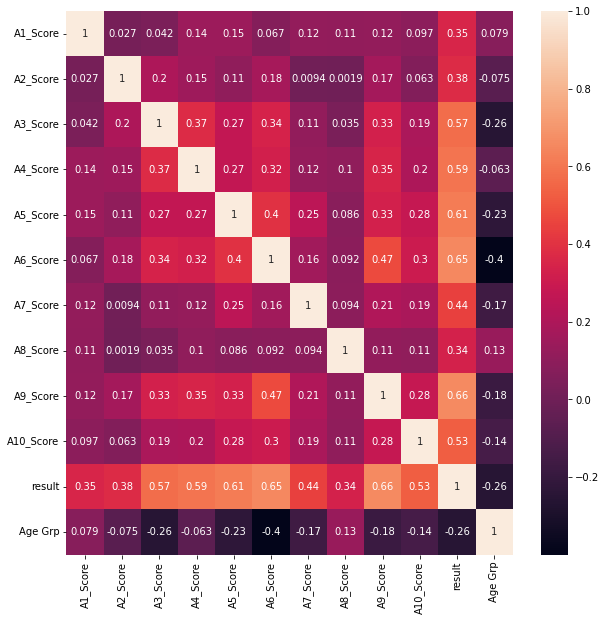

In [24]:
# Adjusting figure size through custom parameters
plt.rcParams['figure.figsize'] = [10, 10]

#ploting the heatmap for correlation
corr = Final_Data.corr()
sns.heatmap(corr, annot=True)

##### Remove one of two features that have a correlation higher than 0.9

In [25]:
delL = []
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            delL.append(j)

####
delL = list(set(delL))
Final_Data.drop(Final_Data.columns[delL], axis = 1, inplace = True)

In [26]:
Final_Data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age Grp', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'used_app_before',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [27]:
Data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'Age Grp', 'relation', 'Class/ASD'],
      dtype='object')

### Checking balance of Dataset

##### Step - 1: To check wether dataset is balanced or not

In [43]:
balanceVal = Final_Data["Class/ASD"].value_counts()

print(balanceVal, end = "\n")

lineDistributer()

print("On Scale of 10 Distribution is,")

print("N or [0] - ", balanceVal[0]/(balanceVal[0]+balanceVal[1]))
print("Y or [1] - ", balanceVal[1]/(balanceVal[0]+balanceVal[1]))

0    707
1    393
Name: Class/ASD, dtype: int64


On Scale of 10 Distribution is,
N or [0] -  0.6427272727272727
Y or [1] -  0.3572727272727273


##### Step - 2: Separating Majority classes from Minority classes

In [44]:
majority = Final_Data[Final_Data["Class/ASD"] == 0]
minority = Final_Data[Final_Data["Class/ASD"] == 1]
minority.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age Grp,age,gender,ethnicity,jundice,austim,used_app_before,age_desc,relation,Class/ASD
4,1,1,1,1,1,1,1,1,1,1,1,5,1,0,1,0,0,0,0,1
6,1,0,1,1,1,1,0,1,0,1,1,5,1,2,0,0,0,0,0,1
7,1,1,1,1,1,1,1,1,0,0,1,5,0,1,0,0,0,0,0,1
8,1,1,1,1,1,1,1,0,0,0,1,11,0,1,0,0,0,0,0,1
10,1,0,0,0,1,1,1,1,1,1,1,10,1,2,1,0,0,0,1,1


##### Step - 3: Trying to balance data

In [45]:
# replace is set so that sample with replacement happens 
# n_samples = 707 because earlier we found same number of majority classes 
# Random State = 27 to reproduce results

upSample = resample(minority, replace = True, n_samples = 707, random_state = 27)

##### Step - 4: Adding back data to balance it a bit better

In [46]:
upSample
finalBalance = pd.concat([majority, upSample])
finalBalance["Class/ASD"].value_counts()
finalBalance

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age Grp,age,gender,ethnicity,jundice,austim,used_app_before,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,1,6,1,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,1,6,1,1,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,0,0,1,6,1,2,0,0,1,0,1,0
3,0,1,0,0,1,1,0,0,0,1,1,5,0,2,1,0,0,0,1,0
5,0,0,1,0,1,1,0,1,0,1,1,4,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1,1,1,1,1,1,1,1,1,1,3,33,0,2,0,1,0,3,1,1
270,0,1,1,1,1,1,0,1,0,1,1,4,1,5,0,0,0,0,0,1
285,0,1,0,1,1,1,1,1,1,1,1,10,0,2,0,0,0,0,3,1
10,1,0,0,0,1,1,1,1,1,1,1,10,1,2,1,0,0,0,1,1


In [47]:
# Type of columns
finalBalance

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age Grp,age,gender,ethnicity,jundice,austim,used_app_before,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,1,6,1,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,1,6,1,1,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,0,0,1,6,1,2,0,0,1,0,1,0
3,0,1,0,0,1,1,0,0,0,1,1,5,0,2,1,0,0,0,1,0
5,0,0,1,0,1,1,0,1,0,1,1,4,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1,1,1,1,1,1,1,1,1,1,3,33,0,2,0,1,0,3,1,1
270,0,1,1,1,1,1,0,1,0,1,1,4,1,5,0,0,0,0,0,1
285,0,1,0,1,1,1,1,1,1,1,1,10,0,2,0,0,0,0,3,1
10,1,0,0,0,1,1,1,1,1,1,1,10,1,2,1,0,0,0,1,1


In [48]:
finalBalance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 599
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   A1_Score         1414 non-null   int64   
 1   A2_Score         1414 non-null   int64   
 2   A3_Score         1414 non-null   int64   
 3   A4_Score         1414 non-null   int64   
 4   A5_Score         1414 non-null   int64   
 5   A6_Score         1414 non-null   int64   
 6   A7_Score         1414 non-null   int64   
 7   A8_Score         1414 non-null   int64   
 8   A9_Score         1414 non-null   int64   
 9   A10_Score        1414 non-null   int64   
 10  Age Grp          1414 non-null   int64   
 11  age              1414 non-null   object  
 12  gender           1414 non-null   category
 13  ethnicity        1414 non-null   category
 14  jundice          1414 non-null   category
 15  austim           1414 non-null   category
 16  used_app_before  1414 non-null   category
 

---

# 3. Build predictive model
#### Naïve Bayes/Regression/Decision tree/SVM/ neuralNW

#### Distributing Data into Train and test sets

In [49]:
# X = To be trained dataset
X = finalBalance.iloc[:, 1:-1].values

# Y = Target to be tested dataset = Class/ASD
y = finalBalance.iloc[:, -1].values

print(X)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 ...
 [1 0 1 ... 0 0 3]
 [0 0 0 ... 0 0 1]
 [1 1 1 ... 0 3 2]]


#### Data Transformation - Min Max Normalization

In [50]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

---

In [51]:
# no riks
new_Finale_datae = finalBalance.copy()

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X)

PCA()

In [52]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[25.14957953 12.43466481  8.75403346  7.4593294   6.93391556  6.18628872
  5.47824004  5.086287    4.57602608  4.35032369  4.20183692  3.6422916
  3.34087901  1.20035074  0.65571248  0.48081987  0.03784643  0.03157466]



In [53]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 25.14957953  37.58424434  46.3382778   53.7976072   60.73152276
  66.91781149  72.39605153  77.48233853  82.0583646   86.40868829
  90.61052521  94.25281681  97.59369582  98.79404656  99.44975904
  99.93057891  99.96842534 100.        ]



Text(0, 0.5, 'Explained variance (%)')

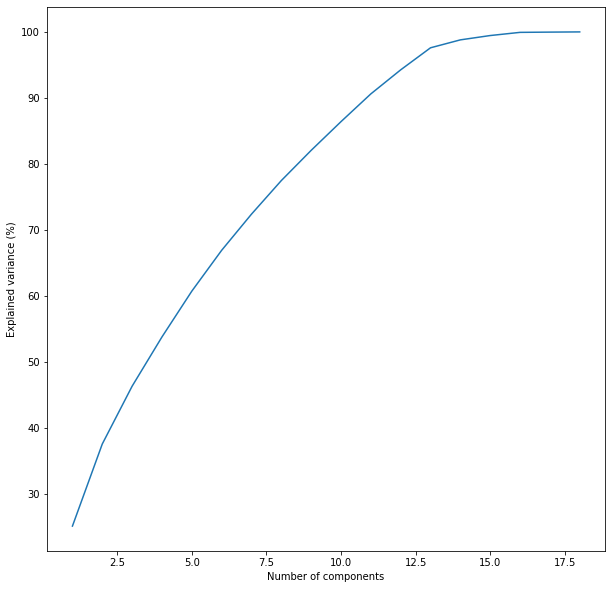

In [54]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

---

In [55]:
# Data splitting
#       - Training : Test = 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.90, random_state = 0)

In [56]:
print(X[1], y[1])

[1.         0.         0.         1.         1.         0.
 1.         0.         0.         0.         0.00527704 1.
 0.1        0.         0.         0.         0.         0.        ] 0


## Naïve Bayes

In [57]:
modelValues(GaussianNB(), "Naïve Bayes", X_train, y_train)

Predicting one record to check the Naïve Bayes model
Desired Prediction = 0, Actual Prediction = [1]
Train -> 80.851%
Test -> 78.162%
K-Fold Cross Validation -> 81.619%

******************************

[[377 263]
 [ 15 618]]


## Logistic Regression

#### Regression should not be used since it is used for continuos data and data selected here is discrete
#### But it can still be used in exceptional cases, below is result of Logistic regression model

In [58]:
modelValues(LogisticRegression(), "Logistic Regression", X_train, y_train)

Predicting one record to check the Logistic Regression model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 97.163%
Test -> 94.423%
K-Fold Cross Validation -> 95.000%

******************************

[[582  58]
 [ 13 620]]


## Decision tree

In [59]:
# Classifier value by default is set to DecisionTreeClassifier()
# ------ So no need to give value in below code line
modelValues(model_name = "Decision Tree", X = X_train, y = y_train)

Predicting one record to check the Decision Tree model
Desired Prediction = 0, Actual Prediction = [1]
Train -> 100.000%
Test -> 84.446%
K-Fold Cross Validation -> 80.857%

******************************

[[506 134]
 [ 64 569]]


## SVC

In [60]:
modelValues(SVC(), "Support Vector Classifier", X_train, y_train)

Predicting one record to check the Support Vector Classifier model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 98.582%
Test -> 93.716%
K-Fold Cross Validation -> 95.000%

******************************

[[576  64]
 [ 16 617]]


In [61]:
# Best model based on test data
bestBaseModel = max(test_percent, key = test_percent.get)
print(bestBaseModel)

Logistic Regression


In [62]:
# bestBaseModel?

---

# 4. Build enhanced model for improving performance
#### Boosting/Boosting variants/Bagging/Random Forest/regression variants

## Random Forest

In [63]:
modelValues(RandomForestClassifier(n_estimators = 50, bootstrap = False, max_depth = 10, 
            random_state = 50), "Random Forest", X_train, y_train, 'boost')

Predicting one record to check the Random Forest model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 91.438%
K-Fold Cross Validation -> 92.238%

******************************

[[558  82]
 [ 27 606]]


##### Parameter Tuning for optimal parameters for best model
Uncomment from p_test to tuning.cv_results line to enable Hyper Parameter Tuning

In [64]:
# Hyper Parameter Tuning

# p_test = {'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750],
#          'max_depth':[3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap':[True, False]}
# tuning = GridSearchCV(estimator = RandomForestClassifier(random_state = 50), 
#                      param_grid = p_test, scoring = 'accuracy', n_jobs = 4, cv = 5)
# tuning.fit(X_train,y_train)
# tuning.cv_results_['mean_test_score'], tuning.best_params_, tuning.best_score_

# Best param = n_estimators : 500, max_depth : 3, bootstrap : True

In [65]:
modelValues(RandomForestClassifier(n_estimators = 500, max_depth = 3, bootstrap = True, 
                                   random_state = 50), "Random Forest", X_train, y_train, 'boost')

Predicting one record to check the Random Forest model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 97.163%
Test -> 91.123%
K-Fold Cross Validation -> 89.381%

******************************

[[541  99]
 [ 14 619]]


## XG Boost

In [66]:
modelValues(XGBClassifier(n_estimators = 50, random_state = 50, learning_rate = 0.01, max_depth = 10,
                          verbosity = 0), "XG Boost", X_train, y_train, 'boost')

Predicting one record to check the XG Boost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 95.035%
Test -> 87.903%
K-Fold Cross Validation -> 87.190%

******************************

[[528 112]
 [ 42 591]]


##### Parameter Tuning for optimal parameters for best model

In [67]:
# Hyper Parameter Tuning

# p_test1 = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10],
#           'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750], 
#           'learning_rate' : [0.3, 0.25, 0.20, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001]}
# tuning = GridSearchCV(estimator = XGBClassifier(random_state = 50), 
#                      param_grid = p_test1, scoring = 'accuracy', n_jobs = 4, cv = 5)
# tuning.fit(X_train,y_train)
# tuning.cv_results_['mean_test_score'], tuning.best_params_, tuning.best_score_

# Best param = max_depth : 3, n_estimators : 1000, learning_rate : 0.15

In [68]:
modelValues(XGBClassifier(max_depth = 3, n_estimators = 1000, learning_rate = 0.15,
                          verbosity = 0, random_state = 50), "XG Boost", X_train, y_train, 'boost')

Predicting one record to check the XG Boost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 92.066%
K-Fold Cross Validation -> 91.476%

******************************

[[560  80]
 [ 21 612]]


## Gradient Boosting

In [69]:
modelValues(GradientBoostingClassifier(n_estimators = 50, random_state = 50, learning_rate = 0.01, max_depth = 10),
            "Gradient Boosting", X_train, y_train, 'boost')

Predicting one record to check the Gradient Boosting model
Desired Prediction = 0, Actual Prediction = [1]
Train -> 100.000%
Test -> 84.132%
K-Fold Cross Validation -> 83.000%

******************************

[[496 144]
 [ 58 575]]


##### Parameter Tuning for optimal parameters for best model

In [70]:
# Hyper Parameter Tuning

# p_test = {'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750],
#          'learning_rate' : [0.3, 0.25, 0.20, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
#          'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
# tuning = GridSearchCV(estimator = GradientBoostingClassifier( max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, 
#                                                             subsample = 1,max_features = 'sqrt', random_state = 10), 
#                      param_grid = p_test, scoring = 'accuracy', n_jobs = 4, cv = 5)
# tuning.fit(X_train,y_train)
# tuning.cv_results_['mean_test_score'], tuning.best_params_, tuning.best_score_

# Best param = n_estimators: 100, learning_rate: 0.3, max_depth : 3

In [71]:
modelValues(GradientBoostingClassifier(n_estimators = 100, random_state = 50, learning_rate = 0.3, max_depth = 3),
            "Gradient Boosting", X_train, y_train, 'boost')

Predicting one record to check the Gradient Boosting model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 89.081%
K-Fold Cross Validation -> 91.429%

******************************

[[531 109]
 [ 30 603]]


## ADA Boost

In [72]:
modelValues(AdaBoostClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 50, random_state = 50,
                               learning_rate = 0.01, algorithm = 'SAMME'),
            "AdaBoost", X_train, y_train, 'boost')

Predicting one record to check the AdaBoost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 93.617%
Test -> 91.909%
K-Fold Cross Validation -> 92.905%

******************************

[[561  79]
 [ 24 609]]


In [73]:
# Hyper Parameter Tuning

# p_test = {'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750],
#          'learning_rate' : [0.3, 0.25, 0.20, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001]}
# tuning = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = p_test, scoring = 'accuracy', n_jobs = 4, cv = 5)
# tuning.fit(X_train,y_train)
# tuning.cv_results_['mean_test_score'], tuning.best_params_, tuning.best_score_

# Best param = n_estimators: 250, learning_rate: 0.3

In [74]:
modelValues(AdaBoostClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 250, random_state = 50,
                               learning_rate = 0.3, algorithm = 'SAMME'),
            "AdaBoost", X_train, y_train, 'boost')

Predicting one record to check the AdaBoost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 93.480%
K-Fold Cross Validation -> 97.143%

******************************

[[589  51]
 [ 32 601]]


## Bagging Classifier

In [75]:
modelValues(BaggingClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 50, random_state = 50), 
            "Bagging", X_train, y_train, 'boost')

Predicting one record to check the Bagging model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 95.745%
Test -> 94.973%
K-Fold Cross Validation -> 95.000%

******************************

[[580  60]
 [  4 629]]


In [76]:
# Hyper Parameter Tuning

# n_estimators
# p_test = {'n_estimators' : [100, 250, 500, 750, 1000, 1250, 1500, 1750]}
# tuning = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = p_test, scoring = 'accuracy', n_jobs = 4, cv = 5)
# tuning.fit(X_train,y_train)
# tuning.cv_results_['mean_test_score'], tuning.best_params_, tuning.best_score_

# Best param = n_estimators: 100

In [77]:
modelValues(BaggingClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 100, random_state = 50), 
            "Bagging", X_train, y_train, 'boost')

Predicting one record to check the Bagging model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 95.745%
Test -> 94.737%
K-Fold Cross Validation -> 95.000%

******************************

[[579  61]
 [  6 627]]


In [78]:
# Best model based on test data
bestBoostModel = max(test_percent2, key = test_percent2.get)
print(bestBoostModel)

Bagging


In [79]:
# bestBoostModel?

---

# 5. Explanation of model selection and performance
#### Allowed to try multiple models for the same

In [80]:
test_percent

{'Naïve Bayes': 78.162,
 'Logistic Regression': 94.423,
 'Decision Tree': 84.446,
 'Support Vector Classifier': 93.716}

In [81]:
test_percent2

{'Random Forest': 91.123,
 'XG Boost': 92.066,
 'Gradient Boosting': 89.081,
 'AdaBoost': 93.48,
 'Bagging': 94.737}

In [82]:
k_fold_percent

{'Naïve Bayes': 81.619,
 'Logistic Regression': 95.0,
 'Decision Tree': 80.857,
 'Support Vector Classifier': 95.0,
 'Random Forest': 89.381,
 'XG Boost': 91.476,
 'Gradient Boosting': 91.429,
 'AdaBoost': 97.143,
 'Bagging': 95.0}

In [83]:
TrainDF = copyDF(train_percent, train_percent2, 'Training Data Accuracy (%)')
TestDF = copyDF(test_percent, test_percent2, 'Test Data Accuracy (%)')

DF = pd.merge(TrainDF, TestDF, on = "Model")

for i in DF.Model:
    if i in list(train_percent.keys()):
        ModelType.append('Base')
    else: ModelType.append('Boost')

DF['K-Fold CV (%)'] = list(k_fold_percent.values())
DF['Model Type'] = ModelType
ModelType = list()

In [84]:
import seaborn as sns

cm = sns.light_palette("Black", as_cmap = True)

DF.style.background_gradient(cmap = cm).set_precision(2).highlight_min(axis = 0, color = 'Red').highlight_max(axis = 0, color='Blue')

,Model,Training Data Accuracy (%),Test Data Accuracy (%),K-Fold CV (%),Model Type
0,Naïve Bayes,80.85,78.16,81.62,Base
1,Logistic Regression,97.16,94.42,95.00,Base
2,Decision Tree,100.00,84.45,80.86,Base
3,Support Vector Classifier,98.58,93.72,95.00,Base
4,Random Forest,97.16,91.12,89.38,Boost
5,XG Boost,100.00,92.07,91.48,Boost
6,Gradient Boosting,100.00,89.08,91.43,Boost
7,AdaBoost,100.00,93.48,97.14,Boost
8,Bagging,95.75,94.74,95.00,Boost


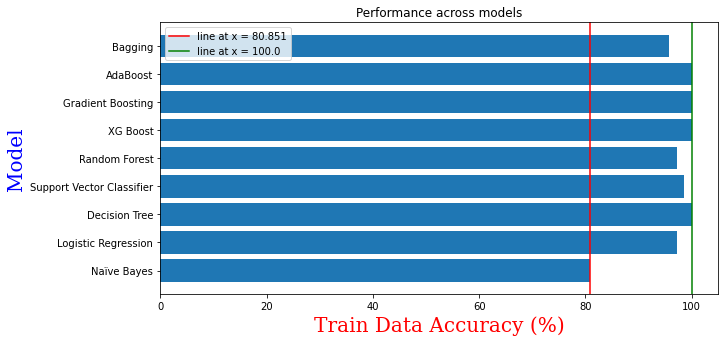

In [85]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['Training Data Accuracy (%)']), max(DF['Training Data Accuracy (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['Training Data Accuracy (%)'])
plt.xlabel('Train Data Accuracy (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

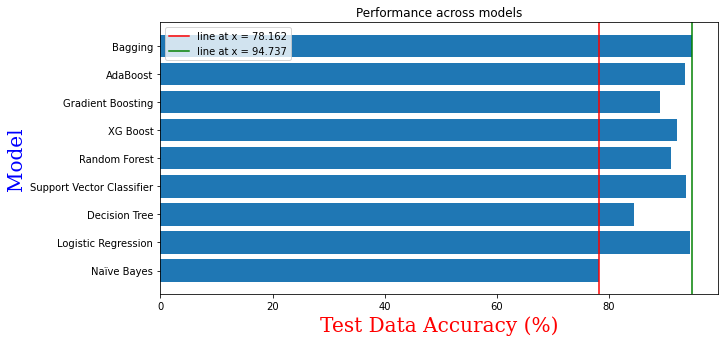

In [86]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['Test Data Accuracy (%)']), max(DF['Test Data Accuracy (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['Test Data Accuracy (%)'])
plt.xlabel('Test Data Accuracy (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

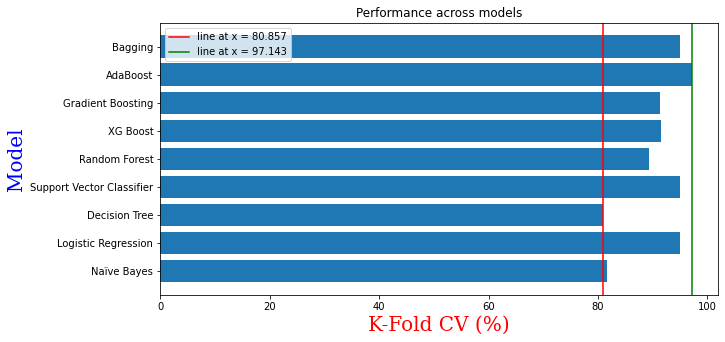

In [87]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['K-Fold CV (%)']), max(DF['K-Fold CV (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['K-Fold CV (%)'])
plt.xlabel('K-Fold CV (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

---

# As a result of above 3 graphs we can point out following observations

### Maximum performance - 
#### a. Training Data Accuracy - 100.00% - achieved by 2 models (Decision Tree, XGBoost, Gradient Boosting and AdaBoost)
#### b. Test Data Accuracy - 94.74% - achived by Bagging boosting model
#### b. K-Fold CV on Test Data: Accuracy - 97.14% - achieved by AdaBoost Bosst model

***